In [1]:
import backtrader as bt
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import backtrader.analyzers as btanalyzers
%matplotlib inline

class DonchianChannelStrategy(bt.Strategy):
    params = (
        ('upper_period', 120),
        ('lower_period', 60),
    )

    def __init__(self):
        self.dataclose = self.datas[0].close

        # Donchian Channelの上限と下限を計算
        self.upper_band = bt.indicators.Highest(self.data.high(-1), period=self.params.upper_period)
        self.lower_band = bt.indicators.Lowest(self.data.low(-1), period=self.params.lower_period)

    def next(self):
        if not self.position:  # 現在ポジションがない場合
            if self.dataclose[0] > self.upper_band[0]:  # 終値が上限バンドを超えた場合
                self.buy()
        else:
            if self.dataclose[0] < self.lower_band[0]:  # 終値が下限バンドを下回った場合
                self.sell()

# Yahoo Financeからデータを取得
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# backtraderに渡すためにDataFrameのカラムをリネーム
data.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# backtraderにデータを渡す
data_feed = bt.feeds.PandasData(dataname=data)


# Cerebroエンジンのセットアップ
cerebro = bt.Cerebro()
cerebro.addstrategy(DonchianChannelStrategy)
cerebro.adddata(data_feed)
cerebro.broker.setcash(10000.0)
cerebro.broker.setcommission(commission=0.001)
cerebro.addanalyzer(btanalyzers.SQN, _name='sqn')

# 初期ポートフォリオの価値
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# 戦略の実行
thestrats = cerebro.run()
thestrat = thestrats[0]

print('SQN:', thestrat.analyzers.sqn.get_analysis())

# 最終ポートフォリオの価値
print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

# 結果のプロット
result = cerebro.plot()

OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k
[*********************100%%**********************]  1 of 1 completed


Starting Portfolio Value: 10000.00
SQN: AutoOrderedDict([('sqn', 2.018194269657101), ('trades', 2)])
Ending Portfolio Value: 10029.36


<IPython.core.display.Javascript object>

In [12]:
result[0][0].show()

OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k


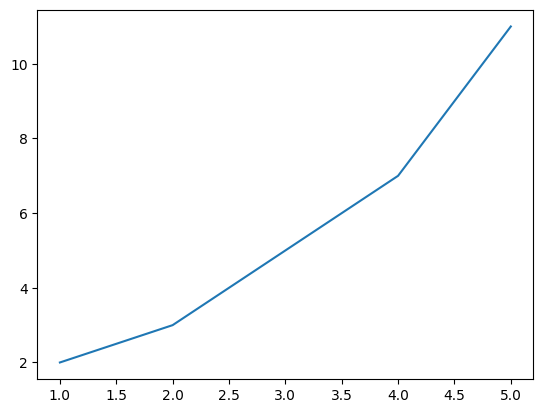

In [1]:
import matplotlib.pyplot as plt


# データを用意
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# FigureとAxesを作成
fig, ax = plt.subplots()

# データをプロット
ax.plot(x, y)

# プロットを表示
plt.show()